# Python - Exploratory Data Analysis on Spotify 2023 Dataset

# Importing the necessary libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overview of the Dataset

In [30]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1') #Reads ".csv" files into a dataframe

In [3]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [31]:
null_counts = df.isnull().sum() #Returns the number of missing values in the dataset
print(null_counts)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


# 2. Basic Descriptive Statistics

In [5]:
print(df["streams"].dtype) #Checking for non-numeric values in the column

object


In [26]:
df["streams"] = pd.to_numeric(df["streams"], errors="coerce") #Converting the column to numeric, forcing errors to NaN

In [27]:
print(df["streams"].isnull().sum()) #Checking for missing values

0


In [24]:
df["streams"].fillna(df["streams"].median(), inplace=True) #Coverting the missing value to NaN

C:\Users\USER\AppData\Local\Temp\ipykernel_5080\563514499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["streams"].fillna(df["streams"].median(), inplace=True) #Coverting the missing value to NaN


In [25]:
# Solving for the mean, median, and mode of the streams column
mean = df["streams"].mean()
median = df["streams"].median()
mode = df["streams"].mode()[0]  

# Printing the results calculated
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 513902790.61594963
Median: 290530915.0
Mode: 156338624.0


In [10]:
year_bins = np.arange(1940, 2028, 4)  # Decade bins from 1940 to 2023

# Group by the defined year bins
out_year = df.groupby(pd.cut(df['released_year'], bins=year_bins, right=False))['released_year'] \
    .agg(**{
        'Min': 'min', 
        'Max': 'max', 
        'Count': 'count'
    })

print("Year Release Analysis:")
print(out_year)

Year Release Analysis:
                  Min     Max  Count
released_year                       
[1940, 1944)   1942.0  1942.0      1
[1944, 1948)   1946.0  1946.0      1
[1948, 1952)   1950.0  1950.0      1
[1952, 1956)   1952.0  1952.0      1
[1956, 1960)   1957.0  1959.0      7
[1960, 1964)   1963.0  1963.0      3
[1964, 1968)      NaN     NaN      0
[1968, 1972)   1968.0  1971.0      4
[1972, 1976)   1973.0  1975.0      3
[1976, 1980)   1979.0  1979.0      1
[1980, 1984)   1982.0  1983.0      3
[1984, 1988)   1984.0  1987.0      9
[1988, 1992)   1991.0  1991.0      2
[1992, 1996)   1992.0  1995.0      4
[1996, 2000)   1996.0  1999.0      8
[2000, 2004)   2000.0  2003.0     12
[2004, 2008)   2004.0  2007.0      6
[2008, 2012)   2008.0  2011.0     19
[2012, 2016)   2012.0  2015.0     47
[2016, 2020)   2016.0  2019.0     87
[2020, 2024)   2020.0  2023.0    733


C:\Users\USER\AppData\Local\Temp\ipykernel_5080\2544928444.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out_year = df.groupby(pd.cut(df['released_year'], bins=year_bins, right=False))['released_year'] \


In [33]:
artist_bins = np.arange(1, 8 + 1, 1) # Creates an array to divide artist_count values into bins

# Bins the artist_count values based on artist_bins
out_artist = df.groupby(pd.cut(df['artist_count'], artist_bins))['artist_count'] \
    .agg(**{ 
        'Min': 'min', 
        'Max': 'max', 
        'Count': 'count',
    })

print("Artist Count Analysis:") 
print(out_artist)

Artist Count Analysis:
              Min  Max  Count
artist_count                 
(1, 2]          2    2    254
(2, 3]          3    3     85
(3, 4]          4    4     15
(4, 5]          5    5      5
(5, 6]          6    6      3
(6, 7]          7    7      2
(7, 8]          8    8      2


C:\Users\USER\AppData\Local\Temp\ipykernel_5080\3773076184.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out_artist = df.groupby(pd.cut(df['artist_count'], artist_bins))['artist_count'] \


In [28]:
highest_streams = df['streams'].max()
print(highest_streams)

3703895074.0


# 3. Top Performers

## Top 5 most streamed Tracks

In [34]:
# sorts the Dataframe in descending order and selects the top 5 most streamed tracks
most_streamed_tracks = df.sort_values(by='streams', ascending = False).head(5)  
print("Top 5 most streamed tracks:")

# Iterates through each row in the top 5 and printing the track name and it's stream count
for idx, row in most_streamed_tracks.iterrows():
    print(f"Track: {row['track_name']}, Streams: {row['streams']}")


Top 5 most streamed tracks:
Track: Love Grows (Where My Rosemary Goes), Streams: BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3
Track: Anti-Hero, Streams: 999748277
Track: Arcade, Streams: 991336132
Track: Glimpse of Us, Streams: 988515741
Track: Seek & Destroy, Streams: 98709329


## Most frequent Artists

In [36]:
# Counts the occurences of each artist's name and selects the top 5 most frequent artists
top_5_artists = df['artist(s)_name'].value_counts().head(5)
print("Top 5 most frequent artists:")

# Prints each artist and their appearance frequency
for artist, count in top_5_artists.items():
    print(f"Artist: {artist}, Frequency: {count}")

Top 5 most frequent artists:
Artist: Taylor Swift, Frequency: 34
Artist: The Weeknd, Frequency: 22
Artist: Bad Bunny, Frequency: 19
Artist: SZA, Frequency: 19
Artist: Harry Styles, Frequency: 17


# 4. Temporal Trends

In [37]:
# Coverts the column into a numeric type and sets any missing or invalid values to "NaN"
df["released_year"] = pd.to_numeric(df["released_year"], errors="coerce")

## No. of Tracks released over time

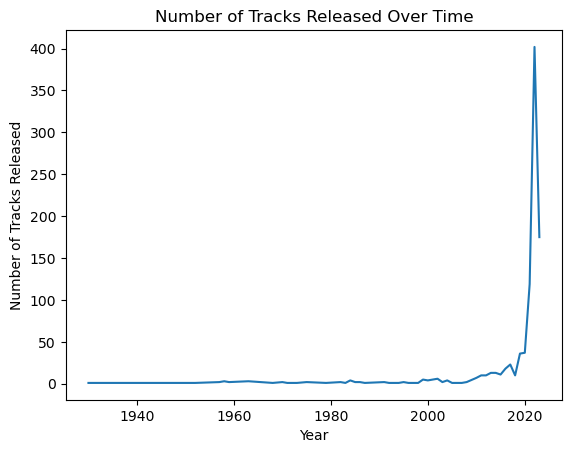

In [17]:
# Group by release year and count the number of tracks released each year
annual_trends = df.groupby('released_year').size()  # This will give the count of tracks per year

# Plotting the number of tracks released over time
annual_trends.plot(kind='line', title='Number of Tracks Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.show()


## No. of Tracks released per Month

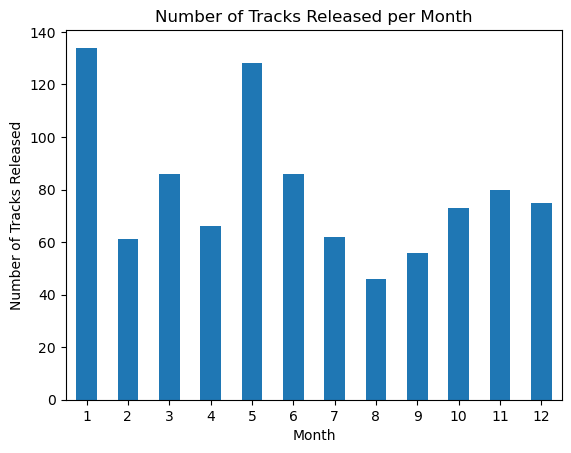

In [18]:
# Group by release year and count the number of tracks released each year
monthly_trends = df.groupby('released_month').size()  # This will give the count of tracks per year

# Plotting the number of tracks released over time
monthly_trends.plot(kind='bar', title='Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(rotation=0)
plt.show()

# 5. Genre and Music characteristics

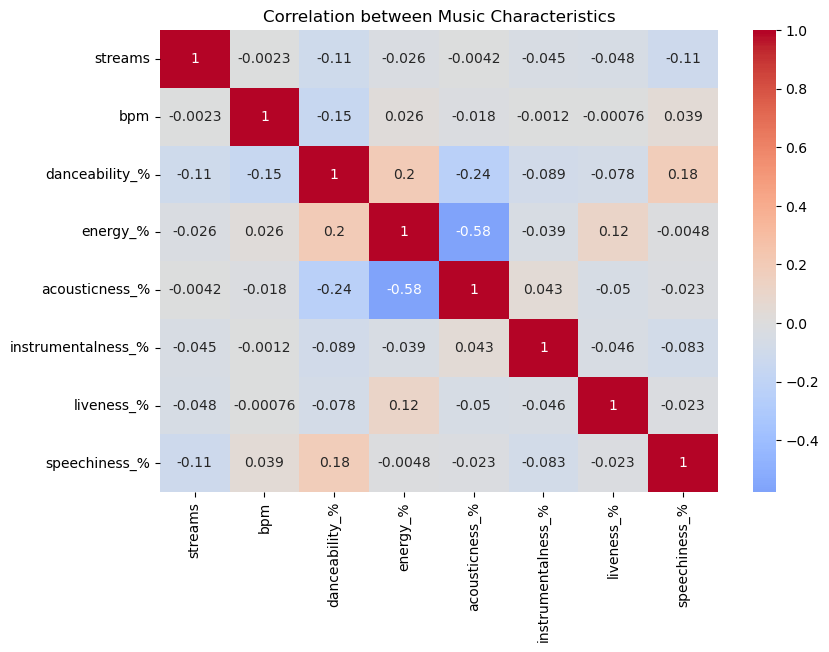

In [19]:
# Select only numerical columns for correlation, including streams and musical characteristics
music_characteristics = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]  # Adjust based on your columns

# Compute the correlation matrix
correlation_matrix = music_characteristics.corr()

# Display the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Music Characteristics")
plt.show()

# 6. Platform Popularity

## Comparison between spotify_playlists, spotify_charts, and apple_playlists.

Comparison of Track Appearances in Different Platforms:
Spotify Playlists: 4955719
Spotify Charts: 11445
Apple Playlists: 64625


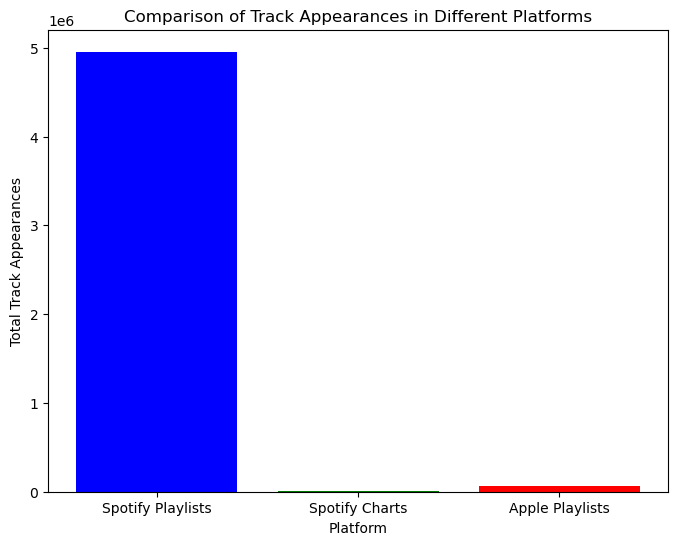

In [20]:
# Calculate total occurrences for each platform
spotify_playlists_total = df['in_spotify_playlists'].sum()
spotify_charts_total = df['in_spotify_charts'].sum()
apple_playlists_total = df['in_apple_playlists'].sum()

# Display results in the console
print("Comparison of Track Appearances in Different Platforms:")
print(f"Spotify Playlists: {spotify_playlists_total}")
print(f"Spotify Charts: {spotify_charts_total}")
print(f"Apple Playlists: {apple_playlists_total}")

# Prepare data for plotting
platform_counts = {
    'Spotify Playlists': spotify_playlists_total,
    'Spotify Charts': spotify_charts_total,
    'Apple Playlists': apple_playlists_total
}

# Convert to a DataFrame for easy plotting
platform_counts_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'Count'])

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(platform_counts_df['Platform'], platform_counts_df['Count'], color=['blue', 'green', 'red'])
plt.title("Comparison of Track Appearances in Different Platforms")
plt.xlabel("Platform")
plt.ylabel("Total Track Appearances")
plt.show()

## Total Appearances of Top 100 Tracks in Playlists and Charts by Platform

Popular Tracks Analysis:
Top 100 tracks in Spotify Playlists: 2055262
Top 100 tracks in Spotify Charts: 2308
Top 100 tracks in Apple Playlists: 22634
Top 100 tracks in Apple Charts: 8384
Top 100 tracks in Deezer Playlists: 26209
Top 100 tracks in Deezer Charts: 545
Top 100 tracks in Shazam Charts: 4152

Spotify favors popular tracks the most.


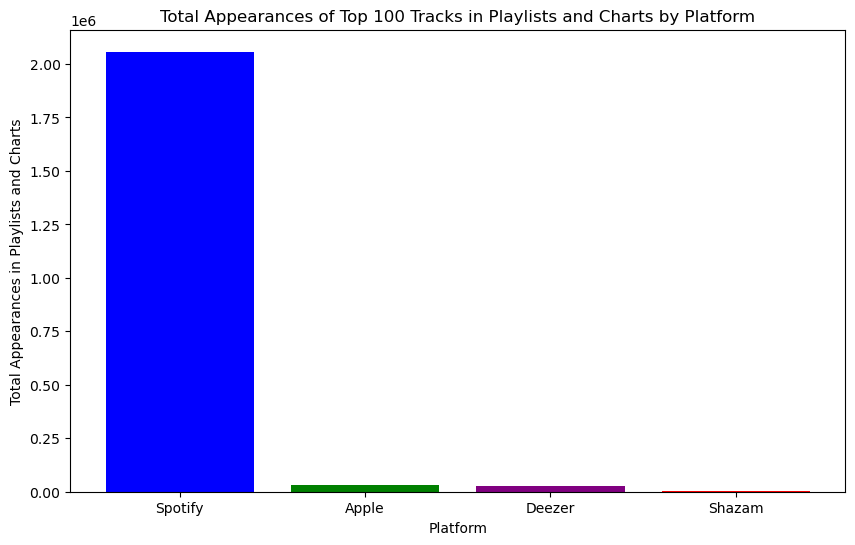

In [21]:
# 1. Define Popular Tracks - Top 100 tracks by stream count
top_tracks = df.nlargest(100, 'streams')

# 2. Ensure columns are numeric and handle non-numeric values by filling them with 0
columns_to_convert = ['in_spotify_playlists', 'in_spotify_charts', 
                      'in_apple_playlists', 'in_apple_charts', 
                      'in_deezer_playlists', 'in_deezer_charts', 
                      'in_shazam_charts']

for column in columns_to_convert:
    top_tracks[column] = pd.to_numeric(top_tracks[column], errors='coerce').fillna(0).astype(int)

# 3. Calculate occurrences of top tracks in each platform
top_tracks_spotify_playlists = top_tracks['in_spotify_playlists'].sum()
top_tracks_spotify_charts = top_tracks['in_spotify_charts'].sum()
top_tracks_apple_playlists = top_tracks['in_apple_playlists'].sum()
top_tracks_apple_charts = top_tracks['in_apple_charts'].sum()
top_tracks_deezer_playlists = top_tracks['in_deezer_playlists'].sum()
top_tracks_deezer_charts = top_tracks['in_deezer_charts'].sum()
top_tracks_shazam_charts = top_tracks['in_shazam_charts'].sum()

# 4. Combine counts for playlists and charts per platform
spotify_total = top_tracks_spotify_playlists + top_tracks_spotify_charts
apple_total = top_tracks_apple_playlists + top_tracks_apple_charts
deezer_total = top_tracks_deezer_playlists + top_tracks_deezer_charts
shazam_total = top_tracks_shazam_charts  # Shazam only has charts, not playlists

# 5. Display counts
print("Popular Tracks Analysis:")
print(f"Top 100 tracks in Spotify Playlists: {top_tracks_spotify_playlists}")
print(f"Top 100 tracks in Spotify Charts: {top_tracks_spotify_charts}")
print(f"Top 100 tracks in Apple Playlists: {top_tracks_apple_playlists}")
print(f"Top 100 tracks in Apple Charts: {top_tracks_apple_charts}")
print(f"Top 100 tracks in Deezer Playlists: {top_tracks_deezer_playlists}")
print(f"Top 100 tracks in Deezer Charts: {top_tracks_deezer_charts}")
print(f"Top 100 tracks in Shazam Charts: {top_tracks_shazam_charts}")

# 6. Interpretation
platform_totals = {
    'Spotify': spotify_total,
    'Apple': apple_total,
    'Deezer': deezer_total,
    'Shazam': shazam_total
}

# Find the platform with the highest total
most_favored_platform = max(platform_totals, key=platform_totals.get)

# Print which platform favors popular tracks the most
print(f"\n{most_favored_platform} favors popular tracks the most.")

# 7. Visualization
platform_names = list(platform_totals.keys())
platform_counts = list(platform_totals.values())

plt.figure(figsize=(10, 6))
plt.bar(platform_names, platform_counts, color=['blue', 'green', 'purple', 'red'])
plt.title("Total Appearances of Top 100 Tracks in Playlists and Charts by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Appearances in Playlists and Charts")
plt.show()

# 7. Advanced Analysis

## Average Streams by Key and Mode

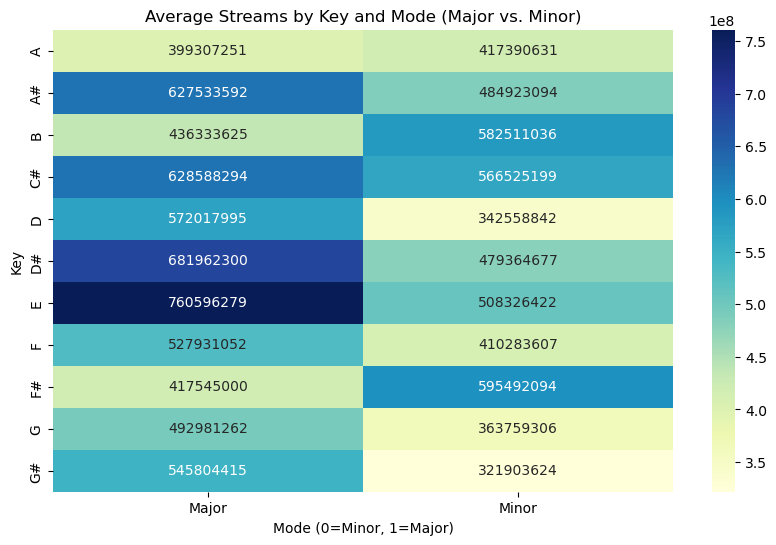

In [23]:
# Group by 'key' and 'mode' and calculate average streams
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().unstack()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.heatmap(key_mode_streams, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Average Streams by Key and Mode (Major vs. Minor)")
plt.xlabel("Mode (0=Minor, 1=Major)")
plt.ylabel("Key")
plt.show()

## Top Artists in Playlists and Charts

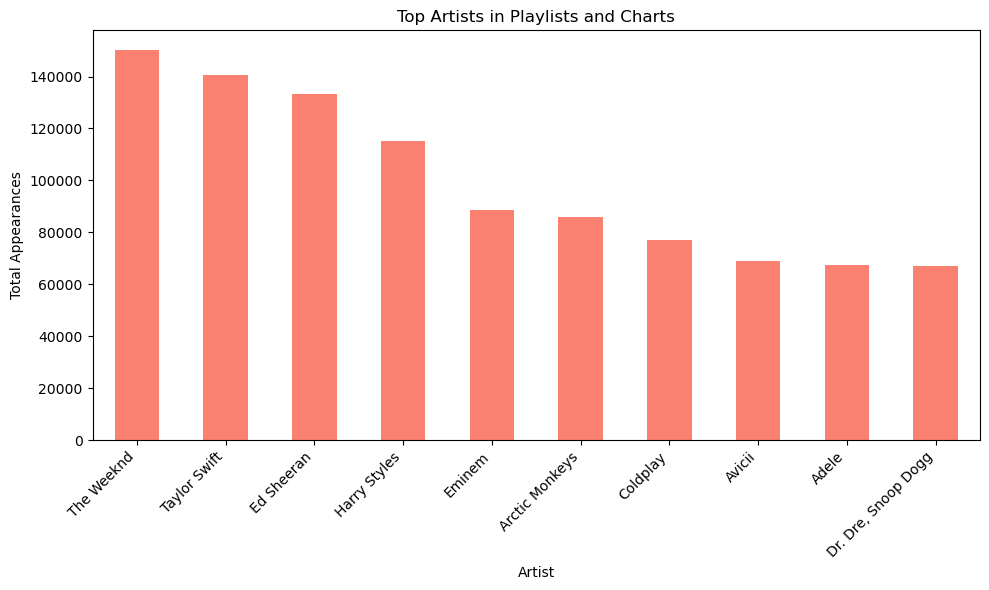

In [22]:
# Ensure playlist/chart columns are boolean or numeric (0/1) so we can sum them correctly
playlist_columns = ['in_spotify_playlists', 'in_spotify_charts', 
                    'in_apple_playlists', 'in_apple_charts', 
                    'in_deezer_playlists', 'in_deezer_charts', 
                    'in_shazam_charts']

# Convert playlist/chart columns to numeric, setting errors='coerce' to handle non-numeric values
# and filling non-numeric values (NaN) with 0
for col in playlist_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Summing up occurrences in playlists/charts for each artist
artist_popularity = df.groupby('artist(s)_name')[playlist_columns].sum()
artist_popularity['Total'] = artist_popularity.sum(axis=1)
top_artists = artist_popularity['Total'].sort_values(ascending=False).head(10)

# Plotting the top 10 artists
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title("Top Artists in Playlists and Charts")
plt.xlabel("Artist")
plt.ylabel("Total Appearances")
plt.xticks(rotation=45, ha='right')  # Rotate artist names for readability

plt.tight_layout()
plt.show()